In [68]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

### Link to the dataset

https://www.kaggle.com/datasets/wordsforthewise/lending-club/data?select=accepted_2007_to_2018Q4.csv.gz

In [2]:
#rejected_loan_data = pd.read_csv('data/rejected_2007_to_2018Q4.csv.gz')
loan_data = pd.read_csv('data/accepted_2007_to_2018Q4.csv.gz', low_memory=False)

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


`issue_d` Month and year when the loan was issued

`addr_state` State provided by the borrower in the loan application

`loan_status` Current status of the loan

In [8]:
# Check null values for entire rows
loan_data[loan_data.isnull().all(axis=1)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,default


In [13]:
# Check null values for issue_d and loan_status columns
len(loan_data[loan_data[['issue_d', 'loan_status']].isnull().all(axis=1)])

33

In [14]:
# Check columns with more than 50% null values
null_percent = (loan_data.isnull().sum() / len(loan_data)) * 100
print(null_percent[null_percent > 50])

member_id                                     100.000000
desc                                           94.423632
mths_since_last_delinq                         51.246715
mths_since_last_record                         84.113069
next_pymnt_d                                   59.509993
mths_since_last_major_derog                    74.309960
annual_inc_joint                               94.660506
dti_joint                                      94.660683
verification_status_joint                      94.880791
mths_since_recent_bc_dlq                       77.011511
mths_since_recent_revol_delinq                 67.250910
revol_bal_joint                                95.221836
sec_app_fico_range_low                         95.221792
sec_app_fico_range_high                        95.221792
sec_app_earliest_cr_line                       95.221792
sec_app_inq_last_6mths                         95.221792
sec_app_mort_acc                               95.221792
sec_app_open_acc               

In [15]:
# Drop unnecessary id columns
loan_data = loan_data.drop(columns=['id', 'member_id'])

# Drop null values in issue_d and loan_status columns
loan_data = loan_data[loan_data[['issue_d', 'loan_status']].notnull().all(axis=1)]

# Drop columns with more than 50% null values
loan_data = loan_data.loc[:, null_percent <= 50]

In [16]:
loan_data['issue_d'].head()

0    Dec-2015
1    Dec-2015
2    Dec-2015
3    Dec-2015
4    Dec-2015
Name: issue_d, dtype: object

In [17]:
# Check values in loan_status column
loan_data['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [18]:
# Add binary column for defaulted loans
loan_data['default'] = loan_data['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'] else 0)

# Add year column from issue date
loan_data['issue_year'] = loan_data['issue_d'].str[-4:].astype(int)

In [19]:
# Check proportion of defaulted loans
(loan_data['default'].value_counts() / len(loan_data)) * 100

default
0    86.603473
1    13.396527
Name: count, dtype: float64

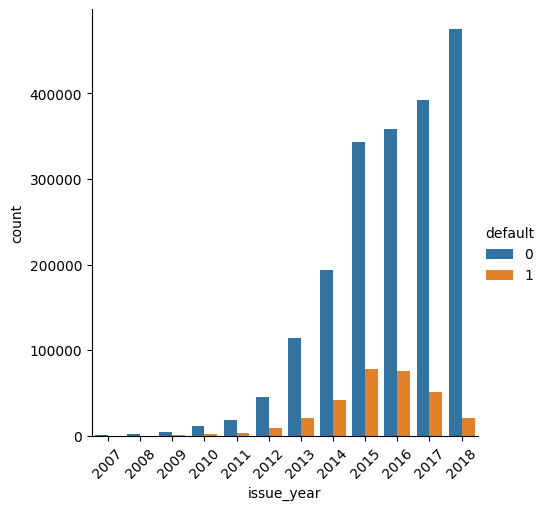

In [21]:
fig = sns.catplot(
    x='issue_year',
    hue='default',
    kind='count',
    data=loan_data,
)
fig.set_xticklabels(rotation=45)  # Rotate labels 45 degrees

In [67]:
# Percentage of defaulted loans per year
defaulted_loans_per_year = loan_data['issue_year'][loan_data['default'] == 1].value_counts()
total_loans_per_year = loan_data['issue_year'].value_counts()

percent_defaulted_per_year = (defaulted_loans_per_year / total_loans_per_year) * 100

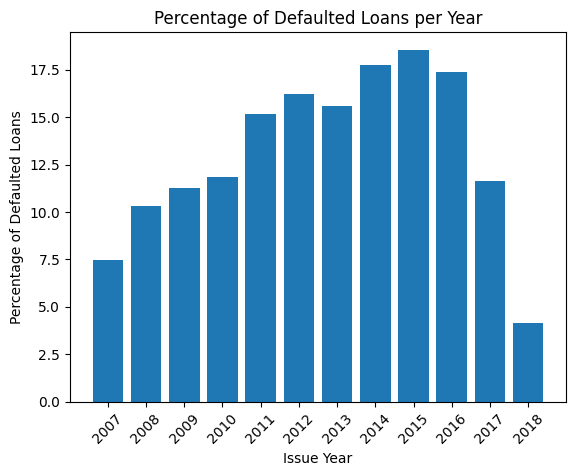

In [83]:
plt.bar(percent_defaulted_per_year.index, percent_defaulted_per_year.values)
plt.xlabel('Issue Year')
plt.ylabel('Percentage of Defaulted Loans')
plt.title('Percentage of Defaulted Loans per Year')
plt.xticks(percent_defaulted_per_year.index, rotation=45);

<Axes: xlabel='loan_amnt', ylabel='Count'>

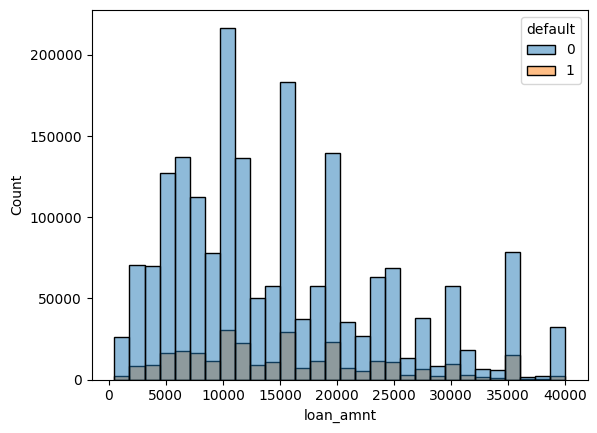

In [22]:
sns.histplot(
    data=loan_data,
    x='loan_amnt',
    hue='default',
    bins=30,
)

## Import yearly unemployment rate data

### Link to the datasets

https://fred.stlouisfed.org/release/tables?rid=116&eid=840687

In [23]:
# Load unemployment rate data from multiple csv files and merge them on observation_date
paths = ["data/unemployment_rate_0.csv", "data/unemployment_rate_1.csv", "data/unemployment_rate_2.csv", "data/unemployment_rate_3.csv", "data/unemployment_rate_4.csv"]

y_unemployment_df = pd.read_csv(paths[0])
for path in paths[1:]:
    df = pd.read_csv(path)
    y_unemployment_df = y_unemployment_df.merge(df, on="observation_date", how="outer")

In [24]:
# Add year column from observation date
y_unemployment_df['year'] = y_unemployment_df['observation_date'].astype('datetime64[ns]').dt.year

# Drop observation date column
y_unemployment_df = y_unemployment_df.drop(columns=['observation_date'])

# Import column names
with open('data/unemployment_rate_dict.json') as f:
    states_ref = json.load(f)

states_names = list(states_ref.keys())
col_names = states_names + ["year"]

# Rename columns
y_unemployment_df.columns = col_names

# Reshape unemployment data to long format
y_unemployment_df = y_unemployment_df.melt(id_vars=["year"], var_name="state", value_name="y_unemployment_rate")

In [25]:
y_unemployment_df.head()

,year,state,y_unemployment_rate
0,1976,AL,6.7
1,1977,AL,7.1
2,1978,AL,6.5
3,1979,AL,7.2
4,1980,AL,8.7


### Merge unemployment rates with loan data

In [26]:
data = loan_data.merge(
    y_unemployment_df,
    left_on=["issue_year", "addr_state"],
    right_on=["year", "state"],
    how="left"
).drop(columns=["year", "state"])

In [27]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,default,issue_year,y_unemployment_rate
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,178050.0,7746.0,2400.0,13734.0,N,Cash,N,0,2015,5.4
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,314017.0,39475.0,79300.0,24667.0,N,Cash,N,0,2015,3.0
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,...,218418.0,18696.0,6200.0,14877.0,N,Cash,N,0,2015,6.0
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,...,381215.0,52226.0,62500.0,18000.0,N,Cash,N,0,2015,5.7
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,439570.0,95768.0,20300.0,88097.0,N,Cash,N,0,2015,5.4


<Axes: xlabel='y_unemployment_rate', ylabel='Count'>

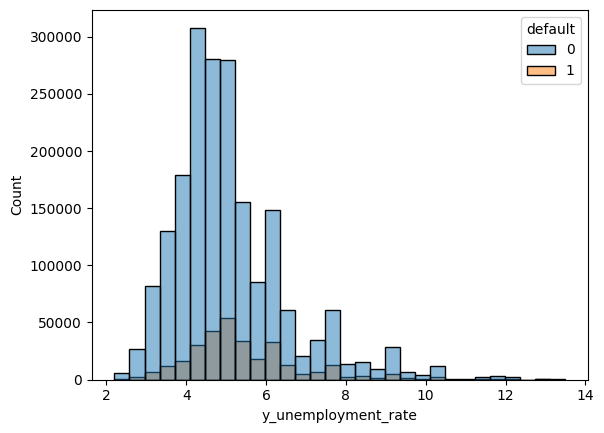

In [ ]:
sns.histplot(
    data=data,
    x='y_unemployment_rate',
    hue='default',
    bins=30,
)